# CAC: Tkinter Application

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: **09/10/2023**

---------------

## `Objective`:  
Develop a functional banking application

## `References`:  
1. **Tkinter**:  https://docs.python.org/3/library/tkinter.html
1. **Python GUI - tkinter**: https://www.geeksforgeeks.org/python-gui-tkinter/

## `Code`:

In [2]:
# importing all the necessary libraries/modules
import tkinter as tk
from tkinter import messagebox
import sqlite3

In [12]:
# Create or connect to database
conn = sqlite3.connect('bank.db')
c = conn.cursor()


# Create table
c.execute('''CREATE TABLE IF NOT EXISTS accounts
             (account_number INTEGER PRIMARY KEY AUTOINCREMENT,
              name TEXT,
              dob TEXT,
              email TEXT,
              mobile_number TEXT,
              address TEXT,
              aadhar_number TEXT,
              account_type TEXT,
              balance REAL)''')
conn.commit()

class BankApp:
    def __init__(self, root):
        self.root = root
        root.title("Bank Application")
        root.configure(bg='lightgrey')

        # Frame to hold the buttons
        button_frame = tk.Frame(root, bg='lightgrey')
        button_frame.pack(pady=20)

        tk.Button(button_frame, text="Create Account", command=self.create_account_window, font=('Arial', 12), width=20, height=2).grid(row=0, column=0, padx=20, pady=10)
        tk.Button(button_frame, text="Make Transaction", command=self.make_transaction_window, font=('Arial', 12), width=20, height=2).grid(row=0, column=1, padx=20, pady=10)
        tk.Button(button_frame, text="Check Balance", command=self.check_balance_window, font=('Arial', 12), width=20, height=2).grid(row=1, column=0, padx=20, pady=10)
        tk.Button(button_frame, text="Deposit Cash", command=self.deposit_cash_window, font=('Arial', 12), width=20, height=2).grid(row=1, column=1, padx=20, pady=10)
        tk.Button(button_frame, text="Update Info", command=self.update_info_window, font=('Arial', 12), width=20, height=2).grid(row=2, column=0, padx=20, pady=10)
        tk.Button(button_frame, text="View Info", command=self.view_info_window, font=('Arial', 12), width=20, height=2).grid(row=2, column=1, padx=20, pady=10)
        tk.Button(button_frame, text="Delete Account", command=self.delete_account_window, font=('Arial', 12), width=20, height=2).grid(row=3, column=0, padx=20, pady=10, columnspan=2)

    def create_account_window(self):
        window = tk.Toplevel(self.root)
        window.title("Create Account")
        window.configure(bg='lightgrey')

        tk.Label(window, text="Account Type:", font=('Arial', 12), bg='lightgrey').grid(row=0, column=0, padx=10, pady=10)
        self.account_type_entry = tk.Entry(window, font=('Arial', 12))
        self.account_type_entry.grid(row=0, column=1, padx=10, pady=10)

        tk.Label(window, text="Name:", font=('Arial', 12), bg='lightgrey').grid(row=1, column=0, padx=10, pady=10)
        self.name_entry = tk.Entry(window, font=('Arial', 12))
        self.name_entry.grid(row=1, column=1, padx=10, pady=10)

        tk.Label(window, text="DOB:", font=('Arial', 12), bg='lightgrey').grid(row=2, column=0, padx=10, pady=10)
        self.dob_entry = tk.Entry(window, font=('Arial', 12))
        self.dob_entry.grid(row=2, column=1, padx=10, pady=10)

        tk.Label(window, text="Email:", font=('Arial', 12), bg='lightgrey').grid(row=3, column=0, padx=10, pady=10)
        self.email_entry = tk.Entry(window, font=('Arial', 12))
        self.email_entry.grid(row=3, column=1, padx=10, pady=10)

        tk.Label(window, text="Mobile Number:", font=('Arial', 12), bg='lightgrey').grid(row=4, column=0, padx=10, pady=10)
        self.mobile_number_entry = tk.Entry(window, font=('Arial', 12))
        self.mobile_number_entry.grid(row=4, column=1, padx=10, pady=10)

        tk.Label(window, text="Address:", font=('Arial', 12), bg='lightgrey').grid(row=5, column=0, padx=10, pady=10)
        self.address_entry = tk.Entry(window, font=('Arial', 12))
        self.address_entry.grid(row=5, column=1, padx=10, pady=10)

        tk.Label(window, text="AADHAR Number:", font=('Arial', 12), bg='lightgrey').grid(row=6, column=0, padx=10, pady=10)
        self.aadhar_number_entry = tk.Entry(window, font=('Arial', 12))
        self.aadhar_number_entry.grid(row=6, column=1, padx=10, pady=10)

        tk.Button(window, text="Create Account", command=self.create_account, font=('Arial', 12), width=15).grid(row=7, columnspan=2, pady=10)

    def create_account(self):
        account_type = self.account_type_entry.get()
        name = self.name_entry.get()
        dob = self.dob_entry.get()
        email = self.email_entry.get()
        mobile_number = self.mobile_number_entry.get()
        address = self.address_entry.get()
        aadhar_number = self.aadhar_number_entry.get()

        c.execute('''INSERT INTO accounts (name, dob, email, mobile_number, address, aadhar_number, account_type, balance)
                    VALUES (?, ?, ?, ?, ?, ?, ?, 0)''', (name, dob, email, mobile_number, address, aadhar_number, account_type))
        conn.commit()
        new_account_number = c.lastrowid
        messagebox.showinfo("Success", f"Account created successfully! Your account number is: {new_account_number}")

    
    def check_balance_window(self):
        window = tk.Toplevel(self.root)
        window.title("Check Balance")
        
        tk.Label(window, text="Account Number:").grid(row=0, column=0)
        self.balance_account_number_entry = tk.Entry(window)
        self.balance_account_number_entry.grid(row=0, column=1)
        
        tk.Button(window, text="Check Balance", command=self.check_balance).grid(row=1, column=1)

    def check_balance(self):
        account_number = int(self.balance_account_number_entry.get())
        c.execute("SELECT * FROM accounts WHERE account_number=?", (account_number,))
        account = c.fetchone()
        if account:
            messagebox.showinfo("Balance", f"Your balance is: ${account[2]}")
        else:
            messagebox.showerror("Error", "Account not found!")

    def make_transaction_window(self):
        window = tk.Toplevel(self.root)
        window.title("Make Transaction")
        
        self.transaction_type = tk.StringVar(value="send")  # Default transaction type
        tk.Radiobutton(window, text="Send Money", variable=self.transaction_type, value="send").grid(row=0, column=0)
        tk.Radiobutton(window, text="Withdraw Cash", variable=self.transaction_type, value="withdraw").grid(row=0, column=1)
        
        tk.Label(window, text="Your Account:").grid(row=1, column=0)
        self.sender_entry = tk.Entry(window)
        self.sender_entry.grid(row=1, column=1)
        
        # Hide receiver account entry for withdrawal
        self.receiver_label = tk.Label(window, text="Receiver Account:")
        self.receiver_label.grid(row=2, column=0)
        self.receiver_entry = tk.Entry(window)
        self.receiver_entry.grid(row=2, column=1)
        
        tk.Label(window, text="Amount:").grid(row=3, column=0)
        self.transaction_amount_entry = tk.Entry(window)
        self.transaction_amount_entry.grid(row=3, column=1)
        
        tk.Button(window, text="Make Transaction", command=self.make_transaction).grid(row=4, column=1)
        
        # Hide or show receiver account entry based on transaction type
        self.transaction_type.trace("w", self.update_receiver_entry_visibility)
        
    def update_receiver_entry_visibility(self, *args):
        if self.transaction_type.get() == "withdraw":
            self.receiver_label.grid_remove()
            self.receiver_entry.grid_remove()
        else:
            self.receiver_label.grid()
            self.receiver_entry.grid()

    def make_transaction(self):
        transaction_type = self.transaction_type.get()
        sender_account = int(self.sender_entry.get())
        amount = float(self.transaction_amount_entry.get())

        c.execute("SELECT * FROM accounts WHERE account_number=?", (sender_account,))
        sender = c.fetchone()

        if transaction_type == "send":
            receiver_account = int(self.receiver_entry.get())
            c.execute("SELECT * FROM accounts WHERE account_number=?", (receiver_account,))
            receiver = c.fetchone()

            if sender and receiver and sender[2] >= amount:
                new_sender_balance = sender[2] - amount
                new_receiver_balance = receiver[2] + amount
                c.execute("UPDATE accounts SET balance=? WHERE account_number=?", (new_sender_balance, sender_account))
                c.execute("UPDATE accounts SET balance=? WHERE account_number=?", (new_receiver_balance, receiver_account))
                conn.commit()
                messagebox.showinfo("Success", "Transaction successful!")
            else:
                messagebox.showerror("Error", "Transaction failed!")

        elif transaction_type == "withdraw":
            if sender and sender[2] >= amount:
                new_sender_balance = sender[2] - amount
                c.execute("UPDATE accounts SET balance=? WHERE account_number=?", (new_sender_balance, sender_account))
                conn.commit()
                messagebox.showinfo("Success", "Withdrawal successful!")
            else:
                messagebox.showerror("Error", "Withdrawal failed!")

    def deposit_cash_window(self):
        window = tk.Toplevel(self.root)
        window.title("Deposit Cash")
        
        tk.Label(window, text="Account Number:").grid(row=0, column=0)
        self.account_number_entry = tk.Entry(window)
        self.account_number_entry.grid(row=0, column=1)
        
        tk.Label(window, text="Amount:").grid(row=1, column=0)
        self.amount_entry = tk.Entry(window)
        self.amount_entry.grid(row=1, column=1)
        
        tk.Button(window, text="Deposit", command=self.deposit_cash).grid(row=2, column=1)

    def deposit_cash(self):
        account_number = int(self.account_number_entry.get())
        amount = float(self.amount_entry.get())
        c.execute("SELECT * FROM accounts WHERE account_number=?", (account_number,))
        account = c.fetchone()
        if account:
            new_balance = account[2] + amount
            c.execute("UPDATE accounts SET balance=? WHERE account_number=?", (new_balance, account_number))
            conn.commit()
            messagebox.showinfo("Success", "Cash deposited successfully!")
        else:
            messagebox.showerror("Error", "Account not found!")
            
    def update_info_window(self):
        window = tk.Toplevel(self.root)
        window.title("Update Information")
        window.configure(bg='lightgrey')

        tk.Label(window, text="Account Number:", font=('Arial', 12), bg='lightgrey').grid(row=0, column=0, padx=10, pady=10)
        self.update_account_number_entry = tk.Entry(window, font=('Arial', 12))
        self.update_account_number_entry.grid(row=0, column=1, padx=10, pady=10)

        tk.Label(window, text="AADHAR Number:", font=('Arial', 12), bg='lightgrey').grid(row=1, column=0, padx=10, pady=10)
        self.update_aadhar_number_entry = tk.Entry(window, font=('Arial', 12))
        self.update_aadhar_number_entry.grid(row=1, column=1, padx=10, pady=10)

        tk.Label(window, text="Name:", font=('Arial', 12), bg='lightgrey').grid(row=2, column=0, padx=10, pady=10)
        self.update_name_entry = tk.Entry(window, font=('Arial', 12))
        self.update_name_entry.grid(row=2, column=1, padx=10, pady=10)

        tk.Label(window, text="DOB:", font=('Arial', 12), bg='lightgrey').grid(row=3, column=0, padx=10, pady=10)
        self.update_dob_entry = tk.Entry(window, font=('Arial', 12))
        self.update_dob_entry.grid(row=3, column=1, padx=10, pady=10)

        tk.Label(window, text="Email:", font=('Arial', 12), bg='lightgrey').grid(row=4, column=0, padx=10, pady=10)
        self.update_email_entry = tk.Entry(window, font=('Arial', 12))
        self.update_email_entry.grid(row=4, column=1, padx=10, pady=10)

        tk.Label(window, text="Mobile Number:", font=('Arial', 12), bg='lightgrey').grid(row=5, column=0, padx=10, pady=10)
        self.update_mobile_number_entry = tk.Entry(window, font=('Arial', 12))
        self.update_mobile_number_entry.grid(row=5, column=1, padx=10, pady=10)

        tk.Label(window, text="Address:", font=('Arial', 12), bg='lightgrey').grid(row=6, column=0, padx=10, pady=10)
        self.update_address_entry = tk.Entry(window, font=('Arial', 12))
        self.update_address_entry.grid(row=6, column=1, padx=10, pady=10)

        tk.Button(window, text="Update Info", command=self.update_info, font=('Arial', 12), width=15).grid(row=7, columnspan=2, pady=10)

    def update_info(self):
        account_number = self.update_account_number_entry.get()
        aadhar_number = self.update_aadhar_number_entry.get()
        name = self.update_name_entry.get()
        dob = self.update_dob_entry.get()
        email = self.update_email_entry.get()
        mobile_number = self.update_mobile_number_entry.get()
        address = self.update_address_entry.get()

        c.execute('''UPDATE accounts SET name=?, dob=?, email=?, mobile_number=?, address=? 
                    WHERE account_number=? AND aadhar_number=?''',
                (name, dob, email, mobile_number, address, account_number, aadhar_number))
        conn.commit()

        if c.rowcount:
            messagebox.showinfo("Success", "Information updated successfully!")
        else:
            messagebox.showerror("Error", "Invalid account number or AADHAR number!")
            
    def view_info_window(self):
        window = tk.Toplevel(self.root)
        window.title("View Information")
        window.configure(bg='lightgrey')

        tk.Label(window, text="Account Number:", font=('Arial', 12), bg='lightgrey').grid(row=0, column=0, padx=10, pady=10)
        self.view_account_number_entry = tk.Entry(window, font=('Arial', 12))
        self.view_account_number_entry.grid(row=0, column=1, padx=10, pady=10)

        tk.Button(window, text="View Info", command=self.view_info, font=('Arial', 12), width=15).grid(row=1, columnspan=2, pady=10)
        
    def view_info(self):
        account_number = self.view_account_number_entry.get()
        c.execute("SELECT * FROM accounts WHERE account_number=?", (account_number,))
        account = c.fetchone()
        if account:
            info = f"""
            Account Number: {account[0]}
            Name: {account[1]}
            DOB: {account[2]}
            Email: {account[3]}
            Mobile Number: {account[4]}
            Address: {account[5]}
            AADHAR Number: {account[6]}
            Account Type: {account[7]}
            Balance: ${account[8]}
            """
            messagebox.showinfo("Account Information", info)
        else:
            messagebox.showerror("Error", "Account not found!")
            
    def delete_account_window(self):
        window = tk.Toplevel(self.root)
        window.title("Delete Account")
        window.configure(bg='lightgrey')

        tk.Label(window, text="Account Number:", font=('Arial', 12), bg='lightgrey').grid(row=0, column=0, padx=10, pady=10)
        self.delete_account_number_entry = tk.Entry(window, font=('Arial', 12))
        self.delete_account_number_entry.grid(row=0, column=1, padx=10, pady=10)

        tk.Label(window, text="AADHAR Number:", font=('Arial', 12), bg='lightgrey').grid(row=1, column=0, padx=10, pady=10)
        self.delete_aadhar_number_entry = tk.Entry(window, font=('Arial', 12))
        self.delete_aadhar_number_entry.grid(row=1, column=1, padx=10, pady=10)

        tk.Button(window, text="Delete Account", command=self.delete_account, font=('Arial', 12), width=15).grid(row=2, columnspan=2, pady=10)

    def delete_account(self):
        account_number = self.delete_account_number_entry.get()
        aadhar_number = self.delete_aadhar_number_entry.get()

        c.execute('''DELETE FROM accounts 
                    WHERE account_number=? AND aadhar_number=?''',
                (account_number, aadhar_number))
        conn.commit()

        if c.rowcount:
            messagebox.showinfo("Success", "Account deleted successfully!")
        else:
            messagebox.showerror("Error", "Invalid account number or AADHAR number!")


In [19]:
if __name__ == "__main__":
    root = tk.Tk()
    app = BankApp(root)
    root.mainloop()

## Screenshots:  

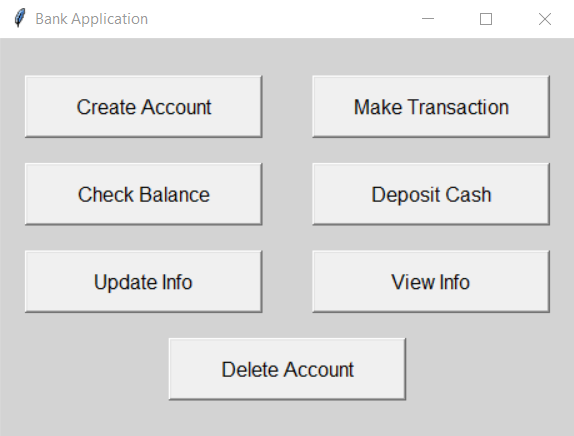  
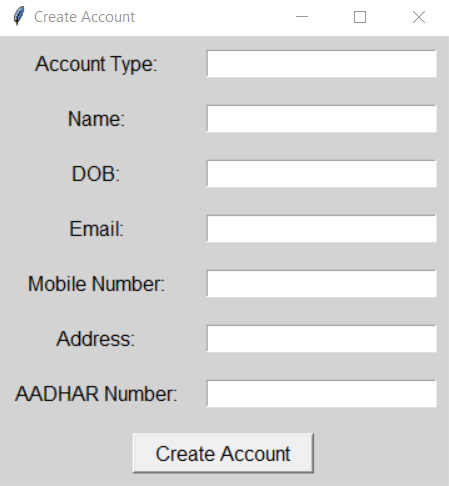  
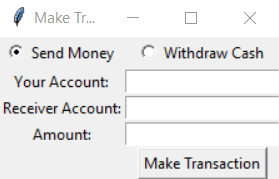  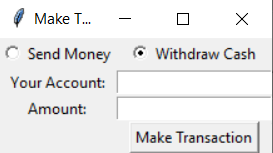  
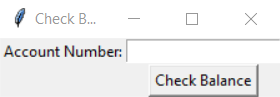  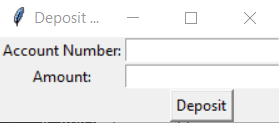  
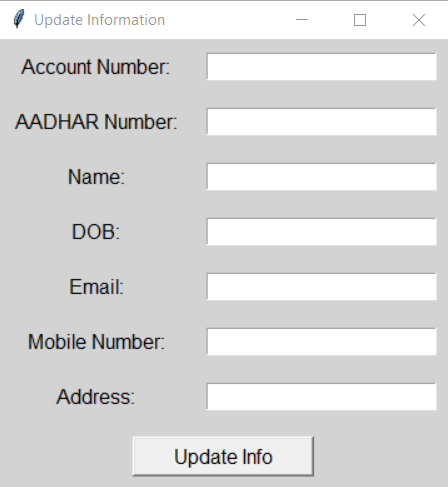  
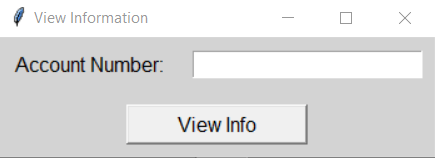  
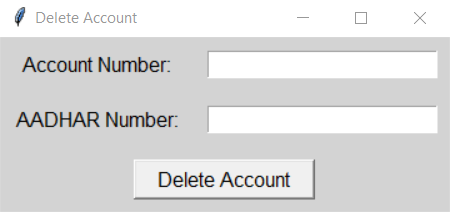

<hr>